 #### Single Index model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, solve
import itertools
import yfinance as yf
from sklearn.linear_model import LinearRegression
import math

 #### Import data
 

In [2]:
indexes = yf.download("TSLA KO V SHEL", start="2011-02-01", end="2022-02-01")

[*********************100%***********************]  4 of 4 completed


In [3]:
returns = indexes['Adj Close'].resample('y').ffill().pct_change()
returns

,KO,SHEL,TSLA,V
Date,,,,
2011-12-31 00:00:00-05:00,NaN,NaN,NaN,NaN
2012-12-31 00:00:00-05:00,0.065276,-0.009087,0.185924,0.504669
2013-12-31 00:00:00-05:00,0.172330,0.090379,3.441394,0.480565
2014-12-31 00:00:00-05:00,0.052661,-0.012650,0.478495,0.186358
2015-12-31 00:00:00-05:00,0.051399,-0.271207,0.079133,0.191373
2016-12-31 00:00:00-05:00,-0.003571,0.282595,-0.109662,0.013712
2017-12-31 00:00:00-05:00,0.143821,0.310230,0.457017,0.471765
2018-12-31 00:00:00-05:00,0.067735,-0.075133,0.068894,0.164876
2019-12-31 00:00:00-05:00,0.205994,0.077085,0.257001,0.433271


In [4]:
returns = returns[1:]
returns

,KO,SHEL,TSLA,V
Date,,,,
2012-12-31 00:00:00-05:00,0.065276,-0.009087,0.185924,0.504669
2013-12-31 00:00:00-05:00,0.172330,0.090379,3.441394,0.480565
2014-12-31 00:00:00-05:00,0.052661,-0.012650,0.478495,0.186358
2015-12-31 00:00:00-05:00,0.051399,-0.271207,0.079133,0.191373
2016-12-31 00:00:00-05:00,-0.003571,0.282595,-0.109662,0.013712
2017-12-31 00:00:00-05:00,0.143821,0.310230,0.457017,0.471765
2018-12-31 00:00:00-05:00,0.067735,-0.075133,0.068894,0.164876
2019-12-31 00:00:00-05:00,0.205994,0.077085,0.257001,0.433271
2020-12-31 00:00:00-05:00,0.024691,-0.374393,7.434370,0.171242


In [5]:
cov_matrix = returns.cov()

In [6]:
returns.mean()

KO      0.084042
SHEL    0.044219
TSLA    1.152410
V       0.241667
dtype: float64

In [7]:
len(returns.mean())

4

 #### Single index model

In [8]:
market = yf.download("^GSPC", start="2011-02-01", end="2022-02-01")

[*********************100%***********************]  1 of 1 completed


In [9]:
mreturns = market['Adj Close'].resample('y').ffill().pct_change()
mreturns

Date
2011-12-31 00:00:00-05:00         NaN
2012-12-31 00:00:00-05:00    0.134057
2013-12-31 00:00:00-05:00    0.296012
2014-12-31 00:00:00-05:00    0.113906
2015-12-31 00:00:00-05:00   -0.007266
2016-12-31 00:00:00-05:00    0.095350
2017-12-31 00:00:00-05:00    0.194200
2018-12-31 00:00:00-05:00   -0.062373
2019-12-31 00:00:00-05:00    0.288781
2020-12-31 00:00:00-05:00    0.162589
2021-12-31 00:00:00-05:00    0.268927
2022-12-31 00:00:00-05:00   -0.052585
Freq: A-DEC, Name: Adj Close, dtype: float64

In [10]:
mreturns = mreturns[1:]
mreturns

Date
2012-12-31 00:00:00-05:00    0.134057
2013-12-31 00:00:00-05:00    0.296012
2014-12-31 00:00:00-05:00    0.113906
2015-12-31 00:00:00-05:00   -0.007266
2016-12-31 00:00:00-05:00    0.095350
2017-12-31 00:00:00-05:00    0.194200
2018-12-31 00:00:00-05:00   -0.062373
2019-12-31 00:00:00-05:00    0.288781
2020-12-31 00:00:00-05:00    0.162589
2021-12-31 00:00:00-05:00    0.268927
2022-12-31 00:00:00-05:00   -0.052585
Freq: A-DEC, Name: Adj Close, dtype: float64

In [11]:
mreturns = mreturns.to_numpy()

In [12]:
mreturns = mreturns.reshape(-1,1)
mreturns

array([[ 0.13405691],
       [ 0.2960125 ],
       [ 0.11390634],
       [-0.007266  ],
       [ 0.09535023],
       [ 0.19419966],
       [-0.0623726 ],
       [ 0.2887807 ],
       [ 0.16258923],
       [ 0.26892739],
       [-0.05258517]])

In [13]:
returns = returns.to_numpy()

In [14]:
returns[:,3]

array([ 0.50466895,  0.48056453,  0.18635825,  0.1913733 ,  0.01371213,
        0.47176527,  0.16487564,  0.43327054,  0.17124181, -0.00314918,
        0.04365279])

In [15]:
returns.shape[1]

4

In [16]:
reg = LinearRegression()

In [17]:
def alpha_beta_calc(returns,RM):
    alphas = []
    betas = []
    reg = LinearRegression()
    for i in range(returns.shape[1]):
        reg.fit(RM,returns[:,i].reshape(-1,1))
        betas.append(reg.coef_[0][0])
        alphas.append(reg.intercept_[0])
    return alphas,betas

In [18]:
alphas, betas = alpha_beta_calc(returns,mreturns)
alphas

[0.036822139666264735,
 -0.01993892010857154,
 0.4203703665787406,
 0.15157882502822084]

In [19]:
betas

[0.36282313474667083,
 0.4929693890871753,
 5.6247855259928325,
 0.6922097867866197]

 #### Ranking the stocks

In [20]:
returns.mean(0)

array([0.08404189, 0.04421877, 1.15241022, 0.24166673])

In [21]:
rf = 0.01

In [22]:
(returns.mean(0)-rf)/betas


array([0.20407159, 0.06941358, 0.20310289, 0.33467705])

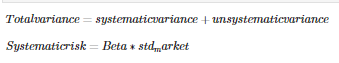

In [23]:
Systematic_var = (betas[0]*mreturns.std())**2

In [24]:
returns.var(0)[0]

0.003987832492137289

In [25]:
UnsystematicRisk = np.sqrt(returns.var(0)[0]-Systematic_var)
UnsystematicRisk

0.04447807339406118

In [26]:
returns.shape[1]

4

In [27]:
betas[3]

0.6922097867866197

In [28]:
mreturns.var()

0.015265298589395878

In [29]:
def cutoff(returns,RM,Betas,rf):
    cutoffs = []
    unsystematic_var = []
    sum1 = 0
    sum2 = 0
    for j in range(returns.shape[1]):
        systematic_var = betas[j]**2*RM.var()
        unsys_var = returns.var(0)[j]-systematic_var
        
        unsystematic_var.append(unsys_var)
        
        sum1 += (returns.mean(0)[j]-rf)*betas[j]/unsys_var
        
        sum2 += betas[j]**2/unsys_var
        
        cutoff = (RM.var()*sum1)/(1+RM.var()*sum2)
        cutoffs.append(cutoff)
    
    return cutoffs,unsystematic_var

In [30]:
cutoffs, unsystematic_var = cutoff(returns,mreturns,betas,rf)
cutoffs

[0.1028349851735852,
 0.1014328404189077,
 0.10651232946470064,
 0.13094056836683185]

In [31]:
systematic_var = betas[0]*mreturns.std()
unsys_var = returns.var(0)[0]-systematic_var
unsys_var

-0.04083998787970095

In [32]:
returns.var(0)[0]-(betas[0]**2*mreturns.var())

0.0019782990128474937

In [33]:
returns.mean(0)

array([0.08404189, 0.04421877, 1.15241022, 0.24166673])

In [34]:
def weightcalc(betas,unsystematic_var,returns,rf,cutoffs):
    zi = []
    for i in range(returns.shape[1]):
        z = (betas[i]/unsystematic_var[i])*(((returns.mean(0)[i]-rf)/betas[i])-cutoffs[3])
        zi.append(z)
    weights = []
    for i in range(returns.shape[1]):
        xi = zi[i]/np.sum(zi)
        weights.append(xi)
    return weights

In [35]:
weights = weightcalc(betas,unsystematic_var,returns,rf,cutoffs)
weights

[0.7491435518822882,
 -0.04031134312371769,
 0.005194016369337717,
 0.28597377487209175]

In [36]:
weights = np.array(weights)
weights

array([ 0.74914355, -0.04031134,  0.00519402,  0.28597377])

In [37]:
returns

array([[ 6.52758067e-02, -9.08655020e-03,  1.85924288e-01,
         5.04668949e-01],
       [ 1.72330050e-01,  9.03789625e-02,  3.44139411e+00,
         4.80564529e-01],
       [ 5.26612442e-02, -1.26498114e-02,  4.78494877e-01,
         1.86358254e-01],
       [ 5.13985134e-02, -2.71206903e-01,  7.91331850e-02,
         1.91373298e-01],
       [-3.57125225e-03,  2.82595445e-01, -1.09662130e-01,
         1.37121284e-02],
       [ 1.43820921e-01,  3.10229866e-01,  4.57017111e-01,
         4.71765269e-01],
       [ 6.77350359e-02, -7.51325008e-02,  6.88935445e-02,
         1.64875644e-01],
       [ 2.05994180e-01,  7.70847413e-02,  2.57001189e-01,
         4.33270543e-01],
       [ 2.46913477e-02, -3.74392681e-01,  7.43436995e+00,
         1.71241812e-01],
       [ 1.13724763e-01,  2.84254100e-01,  4.97555592e-01,
        -3.14917858e-03],
       [ 3.04002299e-02,  1.84331785e-01, -1.13609318e-01,
         4.36527936e-02]])

 #### Test

In [38]:
V = np.sqrt(weights.T @ cov_matrix @ weights)
print(V)

0.09720323979781326


In [39]:
R = np.sum(returns.mean(0) * weights)
R

0.13627291027931887

In [40]:
def test(weights,alphas,betas,RM):
    Rp = 0
    sum1 = 0
    sum2 = 0
    for i in range(len(weights)):
        sum1 += weights[i]*alphas[i]
        sum2 += weights[i]*betas[i]
    Rp = sum1+sum2*RM.mean()
    return Rp

In [41]:
test(weights,alphas,betas,mreturns)

0.13627291027931887